# Analyzing Bitcoin Historical Data

The objetive of this project is to write a Data Science Blog Post analyzing the historical behaviour of bitcoin price. This Project follows the CRISP-DM process outlined for questions through communication.

## Questions:

1. bla
2. bla
3. bla

### Data Acquisition & Preparation

In [1]:
# import of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
cardano_hist = pd.read_csv('input/Cardano Historical Data.csv')
bitcoin_hist = pd.read_csv('input/Bitcoin Historical Data.csv')
ethereum_hist = pd.read_csv('input/Ethereum Historical Data.csv') 

In [142]:
# reformat the Volume column to numeric
def to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return

In [143]:
def data_cleansing(df):
    """
        Clean and process the dataframe of historical prices  
    Args: 
        df: The original dataframe
    Returns: 
        df (DataFrame): post. processed Dataframe
    """
    df = df.rename(columns = {'Change %':'Change','Vol.':'Vol' })
    try:
        df['Price'] = df.Price.str.replace(',', '')
        df['Open'] = df.Open.str.replace(',', '')
        df['High'] = df.High.str.replace(',', '')
        df['Low'] = df.Low.str.replace(',', '')
    except:
        next
    
    if 'Date' in df.columns:
        df.Date = pd.to_datetime(df.Date)
        df[['year','month','day']] = df.Date.apply(lambda x: pd.Series(x.strftime("%Y-%m-%d").split("-")))
        
    df['Vol'] = df['Vol'].apply(to_float)
    
    df['Change'] = df.Change.str.replace('%', '')
    
    return df

In [144]:
cardano_hist = data_cleansing(cardano_hist)
bitcoin_hist = data_cleansing(bitcoin_hist)
ethereum_hist = data_cleansing(ethereum_hist)

### Data Exploration

In [146]:
bitcoin_hist

,Date,Price,Open,High,Low,Vol,Change,year,month,day
0,2021-09-30,43830.0,41551.0,44107.0,41432.0,5110.0,5.48,2021,09,30
1,2021-09-29,41551.0,41064.0,42591.0,40811.0,4390.0,1.19,2021,09,29
2,2021-09-28,41064.0,42191.0,42777.0,40928.0,6160.0,-2.67,2021,09,28
3,2021-09-27,42191.0,43220.5,44354.0,42144.0,4260.0,-2.29,2021,09,27
4,2021-09-26,43180.0,42711.0,43931.0,40830.0,5470.0,1.10,2021,09,26
...,...,...,...,...,...,...,...,...,...,...
1364,2018-01-05,16917.0,15159.0,17101.0,14769.0,54630.0,11.59,2018,01,05
1365,2018-01-04,15160.0,15150.0,15390.0,14064.0,46470.0,0.03,2018,01,04
1366,2018-01-03,15155.0,14713.0,15428.0,14522.0,38350.0,3.03,2018,01,03
1367,2018-01-02,14709.8,13448.0,15300.0,12810.0,56180.0,10.15,2018,01,02


### Results and Conclusions

In [123]:
bitcoin_hist

,Date,Price,Open,High,Low,Vol.,Change,year,month,day,Test
0,2021-09-30,43830.0,41551.0,44107.0,41432.0,5110.0,5.48,2021,09,30,0.054848
1,2021-09-29,41551.0,41064.0,42591.0,40811.0,4390.0,1.19,2021,09,29,0.011860
2,2021-09-28,41064.0,42191.0,42777.0,40928.0,6160.0,-2.67,2021,09,28,-0.026712
3,2021-09-27,42191.0,43220.5,44354.0,42144.0,4260.0,-2.29,2021,09,27,-0.023820
4,2021-09-26,43180.0,42711.0,43931.0,40830.0,5470.0,1.10,2021,09,26,0.010981
...,...,...,...,...,...,...,...,...,...,...,...
1364,2018-01-05,16917.0,15159.0,17101.0,14769.0,54630.0,11.59,2018,01,05,0.115971
1365,2018-01-04,15160.0,15150.0,15390.0,14064.0,46470.0,0.03,2018,01,04,0.000660
1366,2018-01-03,15155.0,14713.0,15428.0,14522.0,38350.0,3.03,2018,01,03,0.030041
1367,2018-01-02,14709.8,13448.0,15300.0,12810.0,56180.0,10.15,2018,01,02,0.093828


In [39]:
bitcoin_hist["Change"] = bitcoin_hist["Change"].astype(float)

In [118]:
cardano_hist.describe()

,Price,Open,High,Low,Vol.,Change,Test,increase
count,1369.000000,1369.000000,1369.000000,1369.000000,1.364000e+03,1369.000000,1369.000000,1369.000000
mean,0.371992,0.371155,0.390300,0.350168,4.595790e+08,0.283711,0.002520,0.506209
std,0.600556,0.598879,0.629559,0.566330,4.666360e+08,6.423972,0.063312,0.500144
min,0.023200,0.023200,0.026500,0.017800,4.810000e+06,-41.490000,-0.415617,0.000000
25%,0.049800,0.049800,0.051700,0.048000,1.510225e+08,-3.020000,-0.030303,0.000000
50%,0.093700,0.093700,0.097900,0.090600,3.285450e+08,0.000000,0.000000,1.000000
75%,0.295900,0.295900,0.312200,0.278800,5.951125e+08,3.040000,0.030717,1.000000
max,2.965200,2.965300,3.098900,2.903000,3.070000e+09,41.730000,0.332389,1.000000


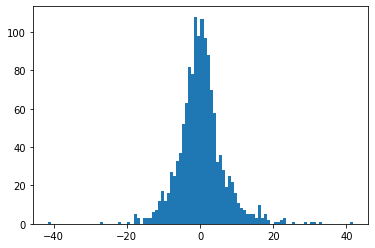

In [121]:
import matplotlib.pyplot as plt

plt.hist(cardano_hist["Change"].astype(float), bins = 100)
plt.show()


In [122]:
eth_hist

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 30, 2021","2,999.86","2,849.34","3,047.00","2,837.55",506.99K,5.19%
1,"Sep 29, 2021","2,851.72","2,803.84","2,949.06","2,785.64",411.25K,1.57%
2,"Sep 28, 2021","2,807.67","2,920.35","2,969.01","2,791.10",511.61K,-4.04%
3,"Sep 27, 2021","2,926.02","3,057.50","3,164.20","2,926.02",510.07K,-4.48%
4,"Sep 26, 2021","3,063.32","2,923.34","3,113.37","2,739.59",703.59K,4.84%
...,...,...,...,...,...,...,...
1342,"Jan 22, 2018",999.37,"1,022.74","1,152.61",944.97,1.00K,-2.29%
1343,"Jan 21, 2018","1,022.74","1,178.29","1,185.39","1,010.84",0.67K,-13.20%
1344,"Jan 20, 2018","1,178.29",979.57,"1,239.89",979.57,0.97K,20.29%
1345,"Jan 19, 2018",979.57,991.01,"1,090.00",871.00,1.71K,-1.15%


In [ ]:
cardano_hist.groupby("month")["Test"].mean()*100

In [140]:
isinstance(bitcoin_hist['Price'], str)

False

In [178]:
import numpy as np
bitcoin_hist[np.isinf(bitcoin_hist["Test"])]

,Date,Price,Open,High,Low,Vol.,Change,year,month,day,Test
4026,2010-07-18,0.1,0,0.1,0.1,80.0,0.00,2010,07,18,inf


In [181]:
cardano_hist.groupby("year")["Test"].mean()*100

year
2017    20.338983
2018    -0.633397
2019     0.054690
2020     0.625602
2021     1.296629
Name: Test, dtype: float64

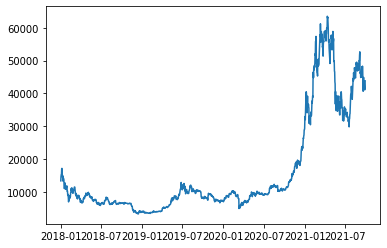

In [116]:
plt.plot(bitcoin_hist["Date"], bitcoin_hist["Price"].astype(float))

In [105]:
cardano_hist["increase"] = np.where(cardano_hist["Test"]>=0,1,0)

In [106]:
cardano_hist["increase"].value_counts()

1    693
0    676
Name: increase, dtype: int64

In [113]:
j = 0.7022
for i in cardano_hist["Change"]:
    j = (1+i/100)*j

In [114]:
j

2.092405885247717

In [71]:
cardano_hist.sort_values(by="Date",inplace = True)

0       0.024643
1       0.014138
2      -0.044341
3      -0.035446
4      -0.039199
          ...   
1364   -0.156864
1365    0.003909
1366    0.104069
1367    0.085161
1368   -0.010986
Name: Test, Length: 1369, dtype: float64

In [75]:
cardano_hist

,Date,Price,Open,High,Low,Vol.,Change,year,month,day,Test,increase
1368,2018-01-01,0.7022,0.7100,0.7150,0.6320,17950000.0,-1.10,2018,01,01,-0.010986,0
1367,2018-01-02,0.7620,0.7022,0.8000,0.6750,10970000.0,8.52,2018,01,02,0.085161,1
1366,2018-01-03,1.0800,0.9782,1.0900,0.8882,20230000.0,41.73,2018,01,03,0.104069,1
1365,2018-01-04,1.1043,1.1000,1.3500,1.0500,19600000.0,2.25,2018,01,04,0.003909,1
1364,2018-01-05,0.9949,1.1800,1.3000,0.9070,18530000.0,-9.91,2018,01,05,-0.156864,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-09-26,2.2084,2.2985,2.2999,2.1490,452940000.0,-3.92,2021,09,26,-0.039199,0
3,2021-09-27,2.1307,2.2090,2.2726,2.1293,288510000.0,-3.52,2021,09,27,-0.035446,0
2,2021-09-28,2.0367,2.1312,2.1716,2.0300,289310000.0,-4.41,2021,09,28,-0.044341,0
1,2021-09-29,2.0658,2.0370,2.1424,2.0220,272690000.0,1.43,2021,09,29,0.014138,1


0.9504000000000001

In [108]:
(1+0.4173)*0.7620

1.0799826000000001